In [25]:
# import the necessary packages

from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = matplotlib.rcParams['figure.dpi'] * 2
import matplotlib.pylab as plt

In [3]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="path to the input image")
# ap.add_argument("-model", "--model", type=str, default="vgg16", help="name of pre-trained network to use")
# args = vars(ap.parse_args())

In [30]:
args = {"model": "vgg16", "image": "/home/guru/Dropbox/learning/horse.jpg"}


In [5]:
# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}
 
# esnure a valid model name was supplied via command line argument
if args["model"] not in MODELS.keys():
	raise AssertionError("The --model command line argument should "
		"be a key in the `MODELS` dictionary")

In [6]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image processing function
if args["model"] in ("inception", "xception"):
	inputShape = (299, 299)
	preprocess = preprocess_input

In [7]:
# load our the network weights from disk (NOTE: if this is the
# first time you are running this script for a given network, the
# weights will need to be downloaded first -- depending on which
# network you are using, the weights can be 90-575MB, so be
# patient; the weights will be cached and subsequent runs of this
# script will be *much* faster)
print("[INFO] loading {}...".format(args["model"]))
Network = MODELS[args["model"]]
model = Network(weights="imagenet")

[INFO] loading vgg16...


In [31]:
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
print("[INFO] loading and pre-processing image...")
image = load_img(args["image"], target_size=inputShape)
image = img_to_array(image)
 
# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through thenetwork
image = np.expand_dims(image, axis=0)
 
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)

[INFO] loading and pre-processing image...


In [32]:
# classify the image
print("[INFO] classifying image with '{}'...".format(args["model"]))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)
 
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

[INFO] classifying image with 'vgg16'...
1. sorrel: 69.33%
2. hartebeest: 29.57%
3. Arabian_camel: 0.68%
4. impala: 0.18%
5. gazelle: 0.16%


In [10]:
# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
orig = cv2.imread(args["image"])
(imagenetID, label, prob) = P[0][0]
cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
# cv2.imshow("Classification", orig)
# cv2.waitKey(0)

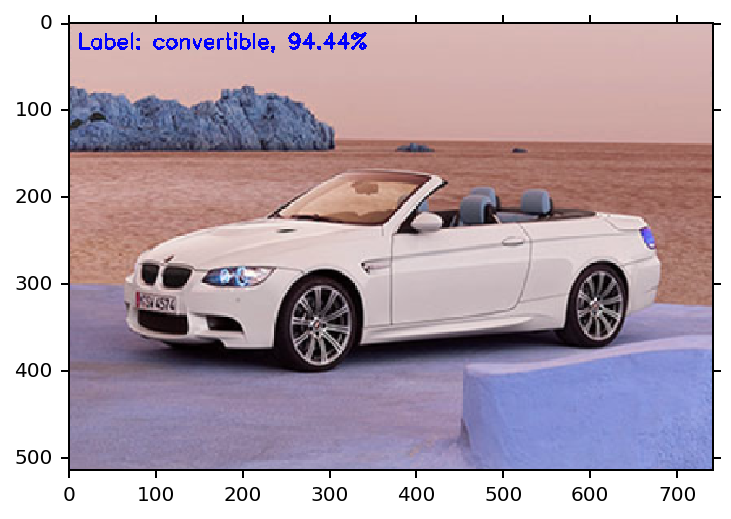

In [15]:

plt.imshow(orig)